In [ ]:
!pip install researchpy
!pip install scikit_posthocs
!pip install lifelines
import pandas as pd # DataFrames
import numpy as np # Estatísticas descritivas
from scipy import stats # Análise univariada e de normalidade de dados quantitativos
import researchpy as rp # Qui-quadrado, Fisher, McNemar
from statsmodels.formula.api import ols # ANOVA
import statsmodels.formula.api as smf # Regressão quantílica
import statsmodels.api as sm # ANOVA, Regressão linear, Regressão Logística
from statsmodels.stats.multicomp import pairwise_tukeyhsd #PostHoc Tukey
import scikit_posthocs as sp # PostHoc Conover, PostHoc Dunn
import scikit_posthocs as sp
from sklearn import linear_model # Regressão linear para gráfico
from patsy import dmatrices # Regressão logística
from lifelines import KaplanMeierFitter # Sobrevida
from lifelines import CoxPHFitter # Regressão de Cox
from lifelines.utils import survival_table_from_events # Tabela de Sobrevida
from lifelines.plotting import plot_lifetimes # Curvas de Sobrevida
from lifelines.statistics import logrank_test # Comparação de curvas de sobrevida
from sklearn.metrics import roc_curve, roc_auc_score # Curva ROC
import seaborn as sns # Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
from plotly.offline import iplot



# Exibir todas as colunas
pd.set_option('display.max_columns', 100)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=951698c1fdeae9420ccdf3d228865363f0b82d3af27a8bb7d1d77a85b5b3b392
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Abrir banco de dados em formato csv
df = pd.read_csv('bancomodelo.csv', sep=';')

In [ ]:
# Número de linhas e colunas
df.shape

(40, 18)

In [ ]:
# Exibir primeiras linhas do banco de dados
df.head()

,ID,genero,idade,data_cirurgia,data_alta,dias_inter,data_obito,dias_obito,obito,es1,es2,has,dm,dpoc,tabagismo,irc,creat_pre,generoX
0,pct-001,0,35.0,01/01/2020,16/01/2020,15.0,NaN,NaN,0,1.51,0.50,1,0,0,0,0,0.9,Feminino
1,pct-002,1,59.0,02/01/2020,NaN,NaN,09/01/2020,7.0,1,2.14,1.05,0,0,1,0,0,0.8,Masculino
2,pct-003,1,68.0,03/01/2020,10/01/2020,7.0,NaN,NaN,0,2.54,0.95,1,1,0,1,0,0.7,Masculino
3,pct-004,0,61.0,06/01/2020,07/02/2020,31.0,NaN,NaN,0,5.36,3.12,1,0,0,1,0,0.9,Feminino
4,pct-005,1,50.0,06/01/2020,12/01/2020,6.0,NaN,NaN,0,0.88,0.82,1,0,1,0,1,1.9,Masculino


In [ ]:
# Exibir informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             40 non-null     object 
 1   genero         40 non-null     int64  
 2   idade          40 non-null     float64
 3   data_cirurgia  40 non-null     object 
 4   data_alta      35 non-null     object 
 5   dias_inter     35 non-null     float64
 6   data_obito     5 non-null      object 
 7   dias_obito     5 non-null      float64
 8   obito          40 non-null     int64  
 9   es1            40 non-null     float64
 10  es2            40 non-null     float64
 11  has            40 non-null     int64  
 12  dm             40 non-null     int64  
 13  dpoc           40 non-null     int64  
 14  tabagismo      40 non-null     int64  
 15  irc            40 non-null     int64  
 16  creat_pre      40 non-null     float64
 17  generoX        40 non-null     object 
dtypes: float64(6

In [ ]:
# Exibir nomes das colunas
df.columns

Index(['ID', 'genero', 'idade', 'data_cirurgia', 'data_alta', 'dias_inter',
       'data_obito', 'dias_obito', 'obito', 'es1', 'es2', 'has', 'dm ', 'dpoc',
       'tabagismo', 'irc', 'creat_pre', 'generoX'],
      dtype='object')

In [ ]:
# Contagem de missings
df.isna().sum()

,0
ID,0
genero,0
idade,0
data_cirurgia,0
data_alta,5
dias_inter,5
data_obito,35
dias_obito,35
obito,0
es1,0


In [ ]:
# Percentual de dados omissos
(df.isnull().sum() / len(df['genero']))

,0
ID,0.000
genero,0.000
idade,0.000
data_cirurgia,0.000
data_alta,0.125
dias_inter,0.125
data_obito,0.875
dias_obito,0.875
obito,0.000
es1,0.000


In [ ]:
# Substituir vírgula por ponto na separação decimal
df['es1'] = df['es1'].apply(lambda x: str(x).replace(',','.'))
df['es2'] = df['es2'].apply(lambda x: str(x).replace(',','.'))
df['creat_pre'] = df['creat_pre'].apply(lambda x: str(x).replace(',','.'))

In [ ]:
# Verificar se substutuição deu certo
df.head()

,ID,genero,idade,data_cirurgia,data_alta,dias_inter,data_obito,dias_obito,obito,es1,es2,has,dm,dpoc,tabagismo,irc,creat_pre,generoX
0,pct-001,0,35.0,01/01/2020,16/01/2020,15.0,NaN,NaN,0,1.51,0.5,1,0,0,0,0,0.9,Feminino
1,pct-002,1,59.0,02/01/2020,NaN,NaN,09/01/2020,7.0,1,2.14,1.05,0,0,1,0,0,0.8,Masculino
2,pct-003,1,68.0,03/01/2020,10/01/2020,7.0,NaN,NaN,0,2.54,0.95,1,1,0,1,0,0.7,Masculino
3,pct-004,0,61.0,06/01/2020,07/02/2020,31.0,NaN,NaN,0,5.36,3.12,1,0,0,1,0,0.9,Feminino
4,pct-005,1,50.0,06/01/2020,12/01/2020,6.0,NaN,NaN,0,0.88,0.82,1,0,1,0,1,1.9,Masculino


In [ ]:
# Converter variáveis para float
df['es1'] = df['es1'].astype('float64')
df['es2'] = df['es2'].astype('float64')
df['creat_pre'] = df['creat_pre'].astype('float64')

In [ ]:
# Conferir se conversão deu certo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             40 non-null     object 
 1   genero         40 non-null     int64  
 2   idade          40 non-null     float64
 3   data_cirurgia  40 non-null     object 
 4   data_alta      35 non-null     object 
 5   dias_inter     35 non-null     float64
 6   data_obito     5 non-null      object 
 7   dias_obito     5 non-null      float64
 8   obito          40 non-null     int64  
 9   es1            40 non-null     float64
 10  es2            40 non-null     float64
 11  has            40 non-null     int64  
 12  dm             40 non-null     int64  
 13  dpoc           40 non-null     int64  
 14  tabagismo      40 non-null     int64  
 15  irc            40 non-null     int64  
 16  creat_pre      40 non-null     float64
 17  generoX        40 non-null     object 
dtypes: float64(6

In [ ]:
# Imputação de dados quantitativos faltantes

df['es1'].fillna(df['es1'].median(), inplace=True)

df['es2'].fillna(df['es2'].median(), inplace=True)

df['idade'].fillna(df['idade'].mean(), inplace=True)


In [ ]:
# Imputação de dados qualitativos
print(df.genero.value_counts())

genero
1    25
0    15
Name: count, dtype: int64


In [ ]:
genero_freq = df.genero.value_counts()[1]

# preencher missing values com o valor acima (1)
df.genero.fillna(genero_freq, inplace=True)

# verificar se há valor ausente
df.genero.isnull().sum()

0

In [ ]:
# Verificação da imputação
df.isna().sum()

,0
ID,0
genero,0
idade,0
data_cirurgia,0
data_alta,5
dias_inter,5
data_obito,35
dias_obito,35
obito,0
es1,0


In [ ]:
# Renomear variável
df = df.rename(columns={'dias inter': 'dias_inter'})

In [ ]:
# Renomear categorias de uma variável
df['generoX'] = df.genero.replace({0: 'Feminino', 1: 'Masculino'})

In [ ]:
# Verificar alterações
df.columns

Index(['ID', 'genero', 'idade', 'data_cirurgia', 'data_alta', 'dias_inter',
       'data_obito', 'dias_obito', 'obito', 'es1', 'es2', 'has', 'dm ', 'dpoc',
       'tabagismo', 'irc', 'creat_pre', 'generoX'],
      dtype='object')

In [ ]:
# Criar novo data frame apenas com colunas de interesse
df2 = df.loc[:,['genero', 'generoX', 'idade', 'dias_inter', 'dias_obito', 'obito', 'es1', 'es2', 'has', 'dm ', 'dpoc',
       'tabagismo', 'irc', 'creat_pre']]

In [ ]:
df2.head()

,genero,generoX,idade,dias_inter,dias_obito,obito,es1,es2,has,dm,dpoc,tabagismo,irc,creat_pre
0,0,Feminino,35.0,15.0,NaN,0,1.51,0.50,1,0,0,0,0,0.9
1,1,Masculino,59.0,NaN,7.0,1,2.14,1.05,0,0,1,0,0,0.8
2,1,Masculino,68.0,7.0,NaN,0,2.54,0.95,1,1,0,1,0,0.7
3,0,Feminino,61.0,31.0,NaN,0,5.36,3.12,1,0,0,1,0,0.9
4,1,Masculino,50.0,6.0,NaN,0,0.88,0.82,1,0,1,0,1,1.9


In [ ]:
df2.shape

(40, 14)

In [ ]:
# Banco de dados com condicionais
# HAS = Sim
# Idade >= 50 anos
# es1 >= 1.0
df3 = df2.loc[(df2['has']== 1) & (df2['idade'] >= 50) & (df2['es1'] >= 1.0)]

In [ ]:
df3.shape

(24, 14)

In [ ]:
# Salvar o arquivo CSV
df.to_csv('bancomodeloedit.csv')

In [ ]:
###############################

In [ ]:
### Análise de normalidade / Descritiva de Dados Quantitativos ###
df2['creat_pre'].describe()

,creat_pre
count,40.000000
mean,1.300000
std,0.866173
min,0.500000
25%,0.875000
50%,1.050000
75%,1.225000
max,4.200000


In [ ]:
# SCIPY - STATS
# Intervalo interquartil (IQR)
stats.iqr(df2.creat_pre, nan_policy='omit')

0.3500000000000001

In [ ]:
stats.describe(df2.creat_pre)

DescribeResult(nobs=40, minmax=(0.5, 4.2), mean=1.3, variance=0.75025641025641, skewness=2.3467332354470085, kurtosis=4.720379056134716)

In [ ]:
# Assimetria
stats.skew(df2.creat_pre)

2.3467332354470085

In [ ]:
# # Curtose
stats.kurtosis(df2.creat_pre)

4.720379056134716

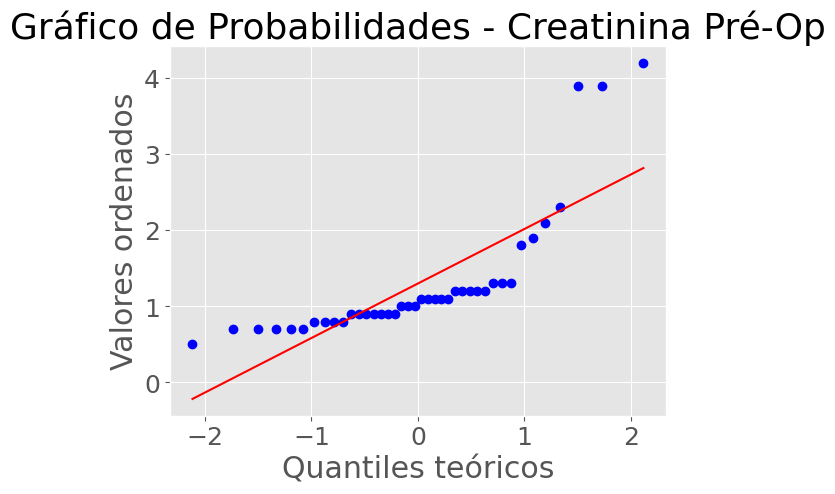

In [ ]:
# SCIPY - STATS
# Gráfico para verificar se distribuição é normal
fig, ax = plt.subplots()
stats.probplot(df2.creat_pre, fit=True, plot=ax)
plt.title('Gráfico de Probabilidades - Creatinina Pré-Op')
plt.xlabel('Quantiles teóricos')
plt.ylabel('Valores ordenados')
plt.show()

In [ ]:
# SCIPY - STATS
# Shapiro-Wilk
stats.shapiro(df2.creat_pre)

ShapiroResult(statistic=0.652364825351827, pvalue=1.7492055345747576e-08)

In [ ]:
# Komolgorov-smirnov
# 1º: Criar objetos para os campos média e desvio padrão
media = np.mean(df2.creat_pre)
dp = np.std(df2.creat_pre, ddof=1)
# 2º: Teste
stats.kstest(df2.creat_pre, cdf='norm', args=(media, dp), N = len(df2.creat_pre))

KstestResult(statistic=0.32499999999999996, pvalue=0.0002914602175357134, statistic_location=1.3, statistic_sign=1)

In [ ]:
# Coeficientes de assimetria para todas as variáveis numéricas do banco
df2.select_dtypes(include='number').skew(axis=0,skipna = True)

,0
genero,-0.536739
idade,-0.774523
dias_inter,3.389429
dias_obito,1.714392
obito,2.357116
es1,2.025008
es2,2.228352
has,-1.200185
dm,0.536739
dpoc,2.037613


In [ ]:
# Coeficientes de curtose para todas as variáveis numéricas
df2.kurtosis(axis=0,skipna = True)

TypeError: could not convert string to float: 'Feminino'

In [ ]:
##########################################

In [ ]:
##### ANÁLISE DESCRITIVA ESTRATIFICADA - DADOS QUANTITATIVOS ##########

In [ ]:
df2.groupby('genero').agg({'idade':['describe']})

idade                                                         
       describe                                                         
          count       mean        std   min   25%        50%   75%   max
genero                                                                  
0          15.0  62.768421  12.790971  35.0  60.0  64.526316  71.5  82.0
1          25.0  65.581053  10.059788  42.0  60.0  66.000000  72.0  85.0

In [ ]:
##########################################

In [ ]:
##### ANÁLISE DESCRITIVA - DADOS QUALITATIVOS ##########

In [ ]:
# Genero
variavel = df2['genero'].value_counts()
mykeys = variavel.keys()
mykeys
myvals = variavel.values
myvals
variavel = pd.DataFrame({'Gênero':mykeys, 'Frequência':myvals})
variavel
variavel['Porcentagem'] = variavel['Frequência']/variavel['Frequência'].sum()*100
variavel

,Gênero,Frequência,Porcentagem
0,1,25,62.5
1,0,15,37.5


In [ ]:
##### ANÁLISE DESCRITIVA ESTRATIFICADA - DADOS QUALITATIVOS ##########

In [ ]:
tabela1 = pd.crosstab(index=df2["genero"], columns=df2["has"], margins=True)
print(tabela1)
tabela2 = tabela1/tabela1.loc["All"]
print(tabela2)

has      0   1  All
genero             
0        4  11   15
1        6  19   25
All     10  30   40
has       0         1    All
genero                      
0       0.4  0.366667  0.375
1       0.6  0.633333  0.625
All     1.0  1.000000  1.000


In [ ]:
#############################
#### TESTE DE PROPORÇÕES ####
#############################

In [ ]:
### Qui-quadrado ###
tabela3 = rp.crosstab(df2['genero'], df['has'], margins=True, test='chi-square', expected_freqs=True)
print(tabela3)

(       has        
has      0   1 All
genero            
0        4  11  15
1        6  19  25
All     10  30  40,                 Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.0356
1                    p-value =    0.8504
2               Cramer's phi =    0.0298,          has       
has        0      1
genero             
0       3.75  11.25
1       6.25  18.75)


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
### Teste Exato de Fisher ###
tabela3 = rp.crosstab(df2['genero'], df['has'], margins=True, test='fisher', expected_freqs=True)
print(tabela3)

(       has        
has      0   1 All
genero            
0        4  11  15
1        6  19  25
All     10  30  40,      Fisher's exact test  results
0          Odds ratio =    1.1515
1     2 sided p-value =    1.0000
2   Left tail p-value =    0.7172
3  Right tail p-value =    0.5680
4        Cramer's phi =    0.0298,          has       
has        0      1
genero             
0       3.75  11.25
1       6.25  18.75)


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:126: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Odds ratio = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
### McNemar (antes / depois) ###
tabela3 = rp.crosstab(df2['has'], df['dpoc'], margins=True, test='mcnemar', expected_freqs=True)
print(tabela3)

Expected frequencies not appropriate for this test, remove argument and try again.
None


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:150: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'McNemar's Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
#########################################
############## CORRELAÇÕES ##############
#########################################

In [ ]:
# Pearson
x = df2.idade
y = df2.es1
stats.pearsonr(x, y)

PearsonRResult(statistic=0.2929566632192731, pvalue=0.06657236534778511)

In [ ]:
# Spearman
x = df2.idade
y = df2.es2
stats.spearmanr(x, y)

SignificanceResult(statistic=0.3334116287438631, pvalue=0.035519263526992674)

In [ ]:
# Tau de Kendall
x = df2.irc
y = df2.obito
stats.kendalltau(x, y)

SignificanceResult(statistic=-0.17407765595569782, pvalue=0.27698616050758385)

In [ ]:
#############################################
###### Análise de Dados Quantitativos #######
#############################################

In [ ]:
####### Teste T para Amostras Independentes ##########

In [ ]:
# Grupos (fator de estratificação)
feminino = df2[df2['genero'] == 0]
masculino = df2[df2['genero'] == 1]

In [ ]:
# Teste de Levene (avaliação da hemocedasticidade)
stats.levene(feminino.idade, masculino.idade)

LeveneResult(statistic=0.4377553147383267, pvalue=0.5122001726979947)

In [ ]:
# Descritiva stratificada
df2.groupby('genero').agg({'idade':[np.size, np.mean, np.std]})

<ipython-input-208-47402b8a2ed0>:2: FutureWarning:

The provided callable <function mean at 0x78ea5cf0bd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-208-47402b8a2ed0>:2: FutureWarning:

The provided callable <function std at 0x78ea5cf0beb0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.



idade                      
        size       mean        std
genero                            
0         15  62.768421  12.790971
1         25  65.581053  10.059788

In [ ]:
# Teste T Amostras Independentes
stats.ttest_ind(feminino['idade'],masculino['idade'], equal_var = True)

TtestResult(statistic=-0.7727714640601766, pvalue=0.44443794282747184, df=38.0)

In [ ]:
################################################
######## Teste T para Uma Amostra ##############
######## Comparação com média populacional #####
################################################

stats.ttest_1samp(df2.idade, 72.0)

TtestResult(statistic=-4.263554991194382, pvalue=0.00012355398427186384, df=39)

In [ ]:
################################################################################
####### Mann-Whitney (Análogo não-paramétrico do Teste T independente) #########
################################################################################

In [ ]:
# Grupos (fator de estratificação)
feminino = df2[df2['genero'] == 0]
masculino = df2[df2['genero'] == 1]

In [ ]:
# Descritiva estratificada
df2.groupby('genero').agg({'creat_pre':[np.size, np.median, stats.iqr]})

<ipython-input-213-05f400f50cf6>:2: FutureWarning:

The provided callable <function median at 0x78ea5c94b490> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



creat_pre            
            size median  iqr
genero                      
0             15    1.1  0.3
1             25    1.0  0.5

In [ ]:
stats.mannwhitneyu(feminino.creat_pre, masculino.creat_pre, use_continuity = True, alternative='two-sided')

MannwhitneyuResult(statistic=212.0, pvalue=0.49981589376710067)

In [ ]:
############################################
###### Teste T para amostras pareadas ######
############################################

# Obs: utilizado es1 e es2 para fins práticos

stats.ttest_rel(df2.es1, df2.es2, nan_policy='omit')

TtestResult(statistic=5.088245533392164, pvalue=9.476526387322797e-06, df=39)

In [ ]:
########### Wilcoxon Signed Rank - Pareado Não Paramétrico ##########
### creat_pre utilizada apenas para demonstração, pois se utiliza a diferença antre as variáveis antes / depois ###

stats.wilcoxon(df2.creat_pre, zero_method='wilcox', correction=False, alternative='two-sided', mode='auto')


WilcoxonResult(statistic=0.0, pvalue=1.8189894035458565e-12)

In [ ]:
#################################
##### ANOVA UMA VIA #############
#################################
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Import anova_lm directly
modelo = sm.ols('idade~tabagismo', data = df2).fit()
anova = anova_lm(modelo, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
tabagismo,1.0,9.533335,9.533335,0.075726,0.784667
Residual,38.0,4783.940350,125.893167,NaN,NaN


In [ ]:
# Descritiva estratificada
df2.groupby('tabagismo').agg({'idade':[np.size, np.mean, np.std, np.median, stats.iqr]})

<ipython-input-224-5952d6430c9a>:2: FutureWarning:

The provided callable <function mean at 0x78ea5cf0bd90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

<ipython-input-224-5952d6430c9a>:2: FutureWarning:

The provided callable <function std at 0x78ea5cf0beb0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.

<ipython-input-224-5952d6430c9a>:2: FutureWarning:

The provided callable <function median at 0x78ea5c94b490> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.



idade                                            
           size       mean        std     median        iqr
tabagismo                                                  
0            21  63.190476  12.580219  65.000000  13.000000
1            11  68.229665   7.664765  68.000000  10.736842
2             8  62.940789  10.904138  66.763158  13.750000

In [ ]:
##### POST HOC #####
tukey = pairwise_tukeyhsd(endog=df2['idade'], groups=df2['tabagismo'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   5.0392 0.4513  -5.0764 15.1548  False
     0      2  -0.2497 0.9984 -11.5416 11.0423  False
     1      2  -5.2889 0.5676 -17.9176  7.3399  False
-----------------------------------------------------


In [ ]:
###########################
##### ANOVA DUAS VIAS #####
###########################
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Import anova_lm directly
modelo2 = sm.ols('idade~tabagismo+has', data = df2).fit()
anova2 = anova_lm(modelo2, type=2)
anova2

,df,sum_sq,mean_sq,F,PR(>F)
tabagismo,1.0,9.533335,9.533335,0.073775,0.787428
has,1.0,2.708102,2.708102,0.020957,0.885682
Residual,37.0,4781.232247,129.222493,NaN,NaN


In [ ]:
df2.groupby(['tabagismo', 'has'])['idade'].mean()

tabagismo  has
0          0      59.750000
           1      64.000000
1          0      73.381579
           1      65.285714
2          0      59.000000
           1      64.254386
Name: idade, dtype: float64

In [ ]:
df2.groupby(['tabagismo', 'has'])['idade'].std()

tabagismo  has
0          0      12.971122
           1      12.752451
1          0       7.239266
           1       6.626067
2          0      18.384776
           1       9.517234
Name: idade, dtype: float64

In [ ]:
#########################################################
### Kruskal-Wallis - análogo não paramétrico da ANOVA ###
#########################################################

In [ ]:
data = [df2.loc[ids, 'creat_pre'].values for ids in df2.groupby('tabagismo').groups.values()]
k = stats.kruskal(*data)
print(k)

KruskalResult(statistic=0.6601168368448469, pvalue=0.7188817362682922)


In [ ]:
# PostHoc Conover
sp.posthoc_conover(df2, val_col='creat_pre', group_col='tabagismo', p_adjust = 'bonferroni')

,0,1,2
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0


In [ ]:
# PostHoc Dunn
sp.posthoc_dunn(df2, val_col='idade', group_col='tabagismo', p_adjust = 'bonferroni')

,0,1,2
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0


In [ ]:

####### REGRESSÃO LINEAR SIMPLES #########


In [ ]:
import statsmodels.api as sm
x = df2.idade
y = df2.es1

In [ ]:
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    es1   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.567
Date:                Tue, 13 Aug 2024   Prob (F-statistic):             0.0666
Time:                        17:53:59   Log-Likelihood:                -108.75
No. Observations:                  40   AIC:                             221.5
Df Residuals:                      38   BIC:                             224.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3814      3.558     -0.669      0.5

In [ ]:
# Equação de predição do desfecho
# y = m*x+b
# m = coef (0.1027)
# b = intercept (-2.3814)
# y = dependente (euroscore1)
# x = independente (idade)

In [ ]:
# Predição do valor do euroScore I  com base na idade (80 anos)
0.1027*80-2.3814

5.834599999999999

0.08582360652457066


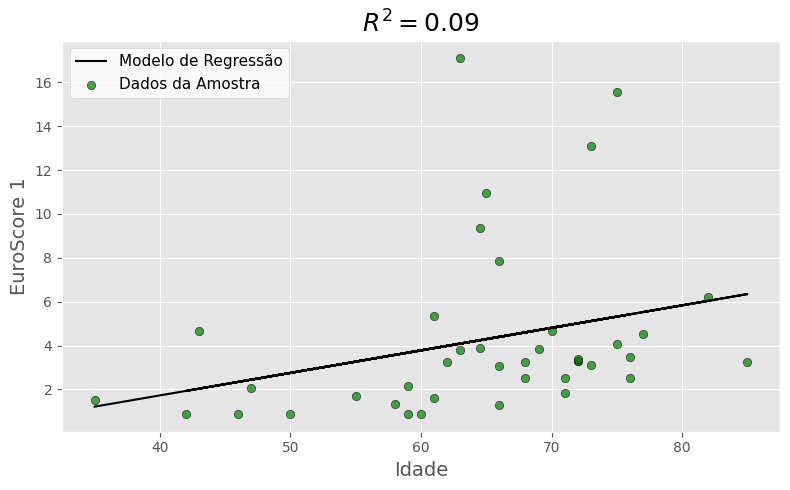

In [ ]:
# Gráfico da regressão
x = df2['idade'].values.reshape(-1,1)
y = df2['es1'].values

ols = linear_model.LinearRegression()
model = ols.fit(x, y)
response = model.predict(x)

r2 = model.score(x, y)

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, response, color='k', label='Modelo de Regressão')
ax.scatter(x, y, edgecolor='k', facecolor='green', alpha=0.7, label='Dados da Amostra')
ax.set_ylabel('EuroScore 1', fontsize=14)
ax.set_xlabel('Idade', fontsize=14)
ax.text(0.8, 0.1, ' ', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='gray', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

print(r2)

In [ ]:
# Pearson
x = df2.idade
y = df2.es1
stats.pearsonr(x, y)

PearsonRResult(statistic=0.2929566632192731, pvalue=0.06657236534778511)

In [ ]:

#### Regressão Linear Múltipla ######


In [ ]:
x = df2[['idade', 'creat_pre']]
y = df2.es1
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    es1   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.980
Date:                Tue, 13 Aug 2024   Prob (F-statistic):              0.152
Time:                        17:54:10   Log-Likelihood:                -108.51
No. Observations:                  40   AIC:                             223.0
Df Residuals:                      37   BIC:                             228.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6515      3.748     -0.441      0.6

In [ ]:
# Equação de predição do desfecho - Regressão multipla
# y = intercept + inclinação1*variável1 + inclinação2*variável2
# 70 anos
# Creat 1.2

y = -1.6515 + (0.1008*70) + (-0.4683*1.2)
print(y)

4.8425400000000005


In [ ]:

##### Regressão Logística #####


In [ ]:
y, x = dmatrices( 'obito ~ idade + has + creat_pre', data=df2, return_type='dataframe')
mod = sm.Logit(y, x)
res = mod.fit()
res.summary()



Optimization terminated successfully.
         Current function value: 0.352396
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  obito   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                 0.06469
Time:                        17:54:10   Log-Likelihood:                -14.096
converged:                       True   LL-Null:                       -15.071
Covariance Type:            nonrobust   LLR p-value:                    0.5829
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3517      3.688     -0.909      0.363     -10.579       3.876
idade          0.0419      0.054      0.780      0.435      -0.063       0.147
has           -0.6181      1.024     -0.604      0.546      -2.625       1.389
creat_pre     -0.8327      1.191     -0.699      0.484      -3.167       1.501
==============================================================================
"""

In [ ]:

print("Coefficients")
print(res.params)
print()
print("p-Values")
print(res.pvalues)
print()
print("Dependent variables")
print(res.model.endog_names)

Coefficients
Intercept   -3.351659
idade        0.041890
has         -0.618140
creat_pre   -0.832684
dtype: float64

p-Values
Intercept    0.363393
idade        0.435383
has          0.546137
creat_pre    0.484369
dtype: float64

Dependent variables
obito


In [ ]:
predictions = res.predict()
print(predictions[0:40])

[0.03721647 0.17561872 0.15391976 0.10303511 0.03054845 0.12417472
 0.08136404 0.10308234 0.28526682 0.25255699 0.06289317 0.08201457
 0.14873722 0.09563412 0.08712109 0.16992428 0.15904576 0.13862156
 0.19648639 0.12395265 0.13322234 0.14867255 0.10706903 0.01151469
 0.17717546 0.22590952 0.26859695 0.09558994 0.11969026 0.1197441
 0.01250836 0.08772697 0.07603143 0.10312958 0.06769238 0.08891888
 0.06494083 0.18321215 0.00345037 0.29398996]


In [ ]:
df2['prob'] = predictions

In [ ]:
df2.head()

,genero,generoX,idade,dias_inter,dias_obito,obito,es1,es2,has,dm,dpoc,tabagismo,irc,creat_pre,prob
0,0,Feminino,35.0,15.0,NaN,0,1.51,0.50,1,0,0,0,0,0.9,0.037216
1,1,Masculino,59.0,NaN,7.0,1,2.14,1.05,0,0,1,0,0,0.8,0.175619
2,1,Masculino,68.0,7.0,NaN,0,2.54,0.95,1,1,0,1,0,0.7,0.153920
3,0,Feminino,61.0,31.0,NaN,0,5.36,3.12,1,0,0,1,0,0.9,0.103035
4,1,Masculino,50.0,6.0,NaN,0,0.88,0.82,1,0,1,0,1,1.9,0.030548


In [ ]:
# Salvar DF2 arquivo CSV
df2.to_csv('df2.csv')

In [ ]:
# ODDS RATIO
res_odds=pd.DataFrame(np.exp(res.params), columns=['OR'])

In [ ]:
res_odds['Z-Value']=res.pvalues

In [ ]:
res_odds[['2.5%', '97.5%']]=np.exp(res.conf_int())

In [ ]:
print(res_odds)

                 OR   Z-Value      2.5%      97.5%
Intercept  0.035026  0.363393  0.000025  48.218949
idade      1.042779  0.435383  0.938598   1.158524
has        0.538946  0.546137  0.072407   4.011528
creat_pre  0.434881  0.484369  0.042150   4.486819


In [ ]:
# Outra maneira
model = sm.GLM.from_formula("obito ~ idade + has + creat_pre", family=sm.families.Binomial(), data=df2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  obito   No. Observations:                   40
Model:                            GLM   Df Residuals:                       36
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.096
Date:                Tue, 13 Aug 2024   Deviance:                       28.192
Time:                        17:54:10   Pearson chi2:                     38.6
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04758
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3517      3.688     -0.909      0.363     -10.579       3.876
idade          0.0419      0.054      0.780      0.435      -0.063       0.147
has           -0.6181      1.024     -0.604      0.546      -2.625       1.389
creat_pre     -0.8327      1.191     -0.699      0.484      -3.166       1.501
==============================================================================
"""

In [ ]:

#### SOBREVIDA #####


In [ ]:
# DF sobrevida
dfS = df2.loc[(df2['obito']== 0)]

In [ ]:
# Criar objeto Kaplan-Meier Function (kmf)
kmf = KaplanMeierFitter()

In [ ]:
# Criar objetivo com variáveis (variáveis apenas para demonstração - HAS como óbito)
dias = dfS.dias_inter
obito = dfS.has

In [ ]:
# Agregando dados ao modelo
kmf.fit(dias, obito, label='Kaplan Meier')

<lifelines.KaplanMeierFitter:"Kaplan Meier", fitted with 35 total observations, 8 right-censored observations>

<Axes: xlabel='timeline'>

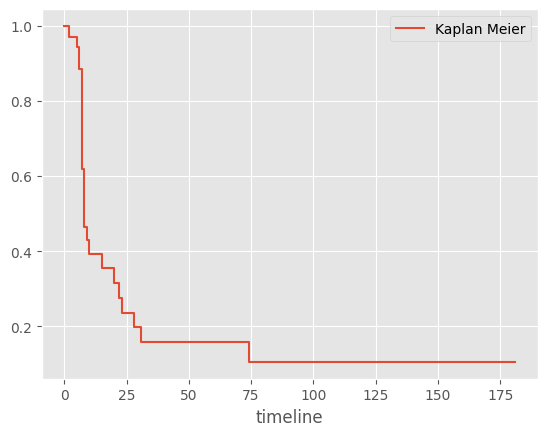

In [ ]:
# Criando uma estimativa
# CI show = confidence interval
kmf.plot(ci_show=False)

In [ ]:
# Curvas para diferentes grupos
# Criar grupos
groups = dfS.genero # Definindo grupos
Feminino = (groups == 0) # Grupo 1
Masculino = (groups == 1) # Grupo 2

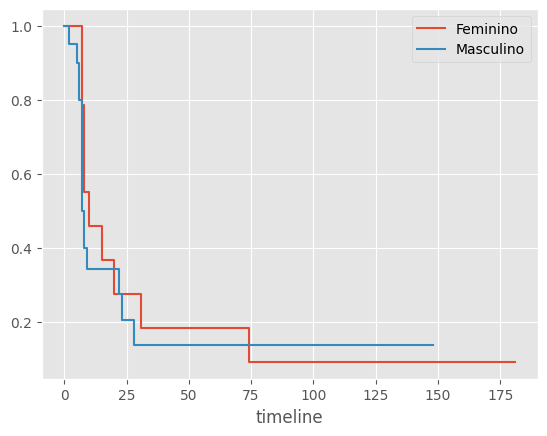

In [ ]:
# Agregar dados do Grupo 1
kmf.fit(dias[Feminino], obito[Feminino], label='Feminino')
F = kmf.plot(ci_show=False)
kmf.fit(dias[Masculino], obito[Masculino], label='Masculino')
M = kmf.plot(ci_show=False)

In [ ]:
cox = CoxPHFitter()

In [ ]:
df_cox = dfS.loc[:,['dias_inter', 'has', 'irc', 'tabagismo', 'genero']]
df_cox.head()

,dias_inter,has,irc,tabagismo,genero
0,15.0,1,0,0,0
2,7.0,1,0,1,1
3,31.0,1,0,1,0
4,6.0,1,1,0,1
5,9.0,1,0,0,1


In [ ]:
cox = CoxPHFitter()
cox.fit(df_cox, 'dias_inter', event_col='has')
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 35 total observations, 8 right-censored observations>
             duration col = 'dias_inter'
                event col = 'has'
      baseline estimation = breslow
   number of observations = 35
number of events observed = 27
   partial log-likelihood = -72.55
         time fit was run = 2024-08-13 17:54:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
irc         1.39       4.00       0.53             0.35             2.43                 1.41                11.31
tabagismo   0.03       1.03       0.25            -0.46             0.51                 0.63                 1.67
genero      0.33       1.38       0.40            -0.45             1.10                 0.64                 3.00

            cmp to    z    p   -log2(p)
covariate                              
irc           0.00 2.61 0.01       6.80
tabagismo     0.00 0.10 0.92       0.13
genero        0.00 0.82 0.41       1.29
---
Concordance = 0.68
Partial AIC = 151.10
log-likelihood ratio test = 6.57 on 3 df
-log2(p) of ll-ratio test = 3.52

In [ ]:
table = survival_table_from_events(df['dias_inter'], df['has'])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,40,40
2.0,1,1,0,0,40
5.0,1,1,0,0,39
6.0,3,2,1,0,38
7.0,10,9,1,0,35
8.0,7,5,2,0,25
9.0,1,1,0,0,18
10.0,2,1,1,0,17
15.0,1,1,0,0,15


In [ ]:
kmf.fit(dias[Feminino], obito[Feminino], label='Feminino')
kmf.survival_function_

,Feminino
timeline,
0.0,1.000000
6.0,1.000000
7.0,0.785714
8.0,0.550000
10.0,0.458333
15.0,0.366667
20.0,0.275000
31.0,0.183333
74.0,0.091667


In [ ]:
kmf.fit(dias[Masculino], obito[Masculino], label='Masculino')
kmf.survival_function_

,Masculino
timeline,
0.0,1.000000
2.0,0.950000
5.0,0.900000
6.0,0.800000
7.0,0.500000
8.0,0.400000
9.0,0.342857
10.0,0.342857
22.0,0.274286


In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(dfS['dias_inter'], event_observed=dfS['has'])
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,35,35
2.0,1,1,0,0,35
5.0,1,1,0,0,34
6.0,3,2,1,0,33
7.0,10,9,1,0,30
8.0,7,5,2,0,20
9.0,1,1,0,0,13
10.0,2,1,1,0,12
15.0,1,1,0,0,10


In [ ]:
#### COMPARAÇÃO DE CURVAS DE EVENTOS #########

In [ ]:
feminino=dfS[dfS['genero']== 0]
masculino=dfS[dfS['genero']==1]

tf = feminino['dias_inter']
sf = feminino['has']
tm = masculino['dias_inter']
sm = masculino['has']

In [ ]:
kmf = KaplanMeierFitter()

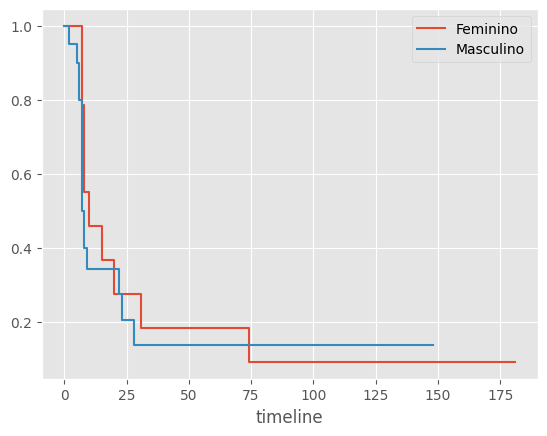

In [ ]:
kmf.fit(dias[Feminino], obito[Feminino], label='Feminino')
F = kmf.plot(ci_show=False)
kmf.fit(dias[Masculino], obito[Masculino], label='Masculino')
M = kmf.plot(ci_show=False)

In [ ]:
# Log Rank Test
logrank = logrank_test(tf, tm, event_observed_A=sf, event_observed_B=sm)
logrank.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.66 0.42      1.27

In [ ]:

####### ROC CURVE #########


In [ ]:
a = df2['has']
b = df2['prob']
c = df2['obito'].values



In [ ]:
# Linha central (50%)
r_probs = [0 for _ in range(len(c))]

In [ ]:
# Cálculo das áreas sob as curvas ROC

print()
r_auc = roc_auc_score(c, r_probs)
print(r_auc)
print()
auc_score = roc_auc_score(a, b)
print(auc_score)


0.5

0.1633333333333333


In [ ]:
# Curvas ROC
r_fpr, r_tpr, _ = roc_curve(c, r_probs)
auc_fpr, rf_tpr, _ = roc_curve(a, b)

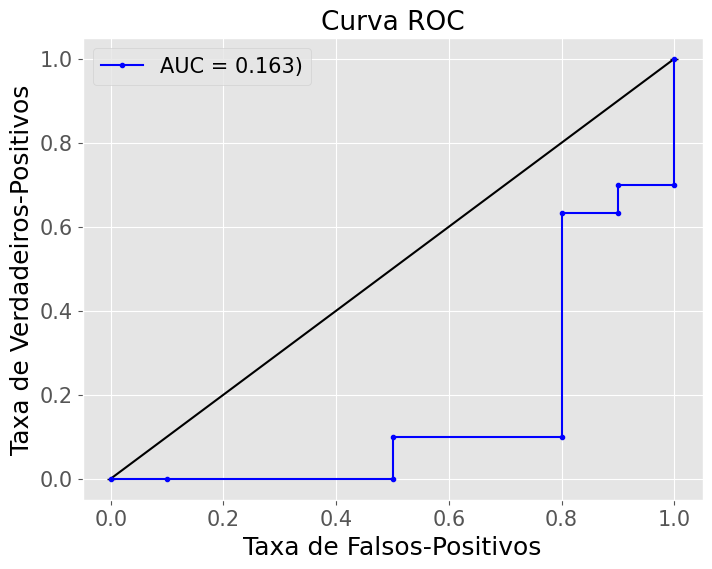

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 15})

plt.plot(r_fpr, r_tpr, marker='_', color = 'black')
plt.plot(auc_fpr, rf_tpr, marker='.', label='AUC = %0.3f)' % auc_score, color = 'blue')
plt.title('Curva ROC', fontsize = 19)
plt.xlabel('Taxa de Falsos-Positivos', fontsize = 18, color = 'black')
plt.ylabel('Taxa de Verdadeiros-Positivos', fontsize = 18, color = 'black')
plt.legend(loc = 0)
plt.show()



In [ ]:
# ROC Teste 2
c = df2['obito'].values
d = df2['es1'].values
e = df2['es2'].values

In [ ]:
# Linha central (50%)
r_probs = [0 for _ in range(len(c))]

In [ ]:
# Cálculo das áreas sob as curvas ROC

print()
r_auc = roc_auc_score(c, r_probs)
print(r_auc)
print()
auc_score2 = roc_auc_score(c, d)
print(auc_score2)
print()
auc_score3 = roc_auc_score(c, e)
print(auc_score3)
print()


0.5

0.5971428571428572

0.7



In [ ]:

r_fpr, r_tpr, _ = roc_curve(c, r_probs)
es1_fpr, es1_tpr, _ = roc_curve(c, d)
es2_fpr, es2_tpr, _ = roc_curve(c, e)

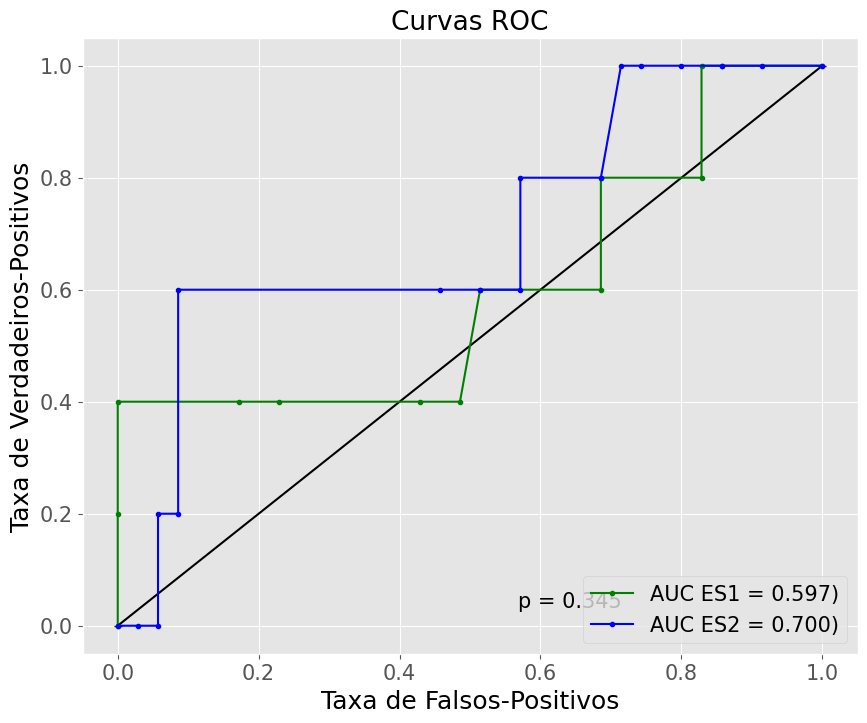

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 15})

plt.plot(r_fpr, r_tpr, marker='_', color = 'black')
plt.plot(es1_fpr, es1_tpr, marker='.', label='AUC ES1 = %0.3f)' % auc_score2, color = 'green')
plt.plot(es2_fpr, es2_tpr, marker='.', label='AUC ES2 = %0.3f)' % auc_score3, color = 'blue')
plt.title('Curvas ROC', fontsize = 19)
plt.xlabel('Taxa de Falsos-Positivos', fontsize = 18, color = 'black')
plt.ylabel('Taxa de Verdadeiros-Positivos', fontsize = 18, color = 'black')
plt.text(0.7, 0.15, 'p = 0.345', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.legend(loc = 4)
plt.show()



In [ ]:

########## DE LONG TEST ##############

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from sklearn import metrics

In [ ]:
def auc(X, Y):
    return 1/(len(X)*len(Y)) * sum([kernel(x, y) for x in X for y in Y])
def kernel(X, Y):
    return .5 if Y==X else int(Y < X)
def structural_components(X, Y):
    V10 = [1/len(Y) * sum([kernel(x, y) for y in Y]) for x in X]
    V01 = [1/len(X) * sum([kernel(x, y) for x in X]) for y in Y]
    return V10, V01

def get_S_entry(V_A, V_B, auc_A, auc_B):
    return 1/(len(V_A)-1) * sum([(a-auc_A)*(b-auc_B) for a,b in zip(V_A, V_B)])
def z_score(var_A, var_B, covar_AB, auc_A, auc_B):
    return (auc_A - auc_B)/((var_A + var_B - 2*covar_AB)**(.5))

In [ ]:

# ES1 vs. ES2 - Óbito
actual = df2['obito']
preds_A = df2['es1']
preds_B = df2['es2']

def group_preds_by_label(preds, actual):
    X = [p for (p, a) in zip(preds, actual) if a]
    Y = [p for (p, a) in zip(preds, actual) if not a]
    return X, Y

X_A, Y_A = group_preds_by_label(preds_A, actual)
X_B, Y_B = group_preds_by_label(preds_B, actual)

V_A10, V_A01 = structural_components(X_A, Y_A)
V_B10, V_B01 = structural_components(X_B, Y_B)

auc_A = auc(X_A, Y_A)
auc_B = auc(X_B, Y_B)

# Compute entries of covariance matrix S (covar_AB = covar_BA)
var_A = (get_S_entry(V_A10, V_A10, auc_A, auc_A) * 1/len(V_A10)
         + get_S_entry(V_A01, V_A01, auc_A, auc_A) * 1/len(V_A01))
var_B = (get_S_entry(V_B10, V_B10, auc_B, auc_B) * 1/len(V_B10)
         + get_S_entry(V_B01, V_B01, auc_B, auc_B) * 1/len(V_B01))
covar_AB = (get_S_entry(V_A10, V_B10, auc_A, auc_B) * 1/len(V_A10)
            + get_S_entry(V_A01, V_B01, auc_A, auc_B) * 1/len(V_A01))

# Two tailed test
z = z_score(var_A, var_B, covar_AB, auc_A, auc_B)
p = stats.norm.sf(abs(z))*2

In [ ]:
print(z)
print()
print(p)

-0.9440381654167816

0.3451501455858301


In [ ]:

######### REGRESSÃO QUANTÍLICA ##########

# Variável dependente se afasta da distribuição normal

In [ ]:
mod = smf.quantreg('es2 ~ idade + es1', df2)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                    es2   Pseudo R-squared:               0.2095
Model:                       QuantReg   Bandwidth:                      0.9864
Method:                 Least Squares   Sparsity:                        1.863
Date:                Tue, 13 Aug 2024   No. Observations:                   40
Time:                        17:54:13   Df Residuals:                       37
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3931      0.886      0.444      0.660      -1.402       2.188
idade          0.0051      0.014      0.363      0.718      -0.023       0.034
es1            0.1243      0.040      3.095      0.004       0.043       0.206


In [ ]:
#### REGRESSÃO LINEAR #### COMPARAÇÃO
import statsmodels.api as sm
x = df2[['idade', 'es1']]
y = df2.es2
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    es2   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     10.86
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           0.000195
Time:                        17:54:13   Log-Likelihood:                -54.292
No. Observations:                  40   AIC:                             114.6
Df Residuals:                      37   BIC:                             119.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1770      0.930      0.190      0.8

In [ ]:
df2.columns

Index(['genero', 'generoX', 'idade', 'dias_inter', 'dias_obito', 'obito',
       'es1', 'es2', 'has', 'dm ', 'dpoc', 'tabagismo', 'irc', 'creat_pre',
       'prob'],
      dtype='object')

<ipython-input-301-ee9845d14302>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.075, 0.83, 'p = 0.345')

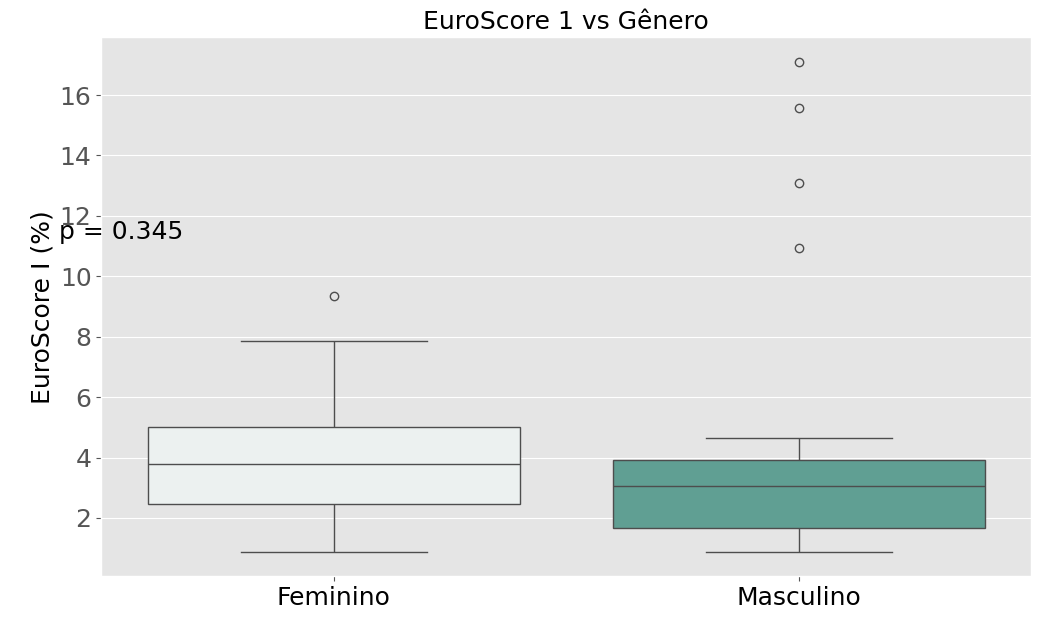

In [ ]:
### BOX PLOT

plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 18})

sns.boxplot(x="genero", y="es1", data=df2, palette='light:#5A9')
plt.title('EuroScore 1 vs Gênero', fontsize=18)
plt.xlabel('', fontsize=18)
plt.ylabel('EuroScore I (%)', fontsize=18, color='black')
plt.xticks([0, 1], ['Feminino', 'Masculino'], color='black')
plt.text(0.075, 0.83, 'p = 0.345', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# plt.savefig('boxplot.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

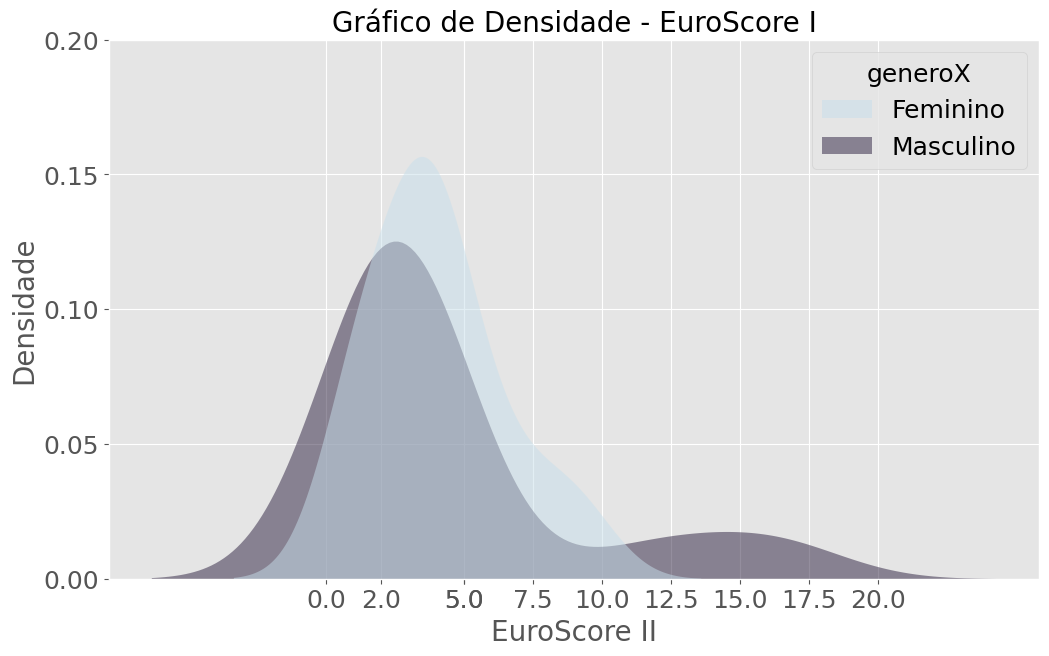

In [ ]:
plt.figure(figsize=(12,7))

sns.kdeplot(
   data=df2, x="es1", hue="generoX",
   fill=True, common_norm=False, palette="ch:s=.25,rot=-.25",
   alpha=.5, linewidth=0,
)

plt.title('Gráfico de Densidade - EuroScore I', fontsize=20)
plt.xlabel('EuroScore II', fontsize=20)
plt.ylabel('Densidade', fontsize=20)
plt.xticks([0, 2,5, 5, 7.5, 10, 12.5, 15, 17.5, 20])
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])


plt.grid(True)

# plt.savefig('densityplot.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

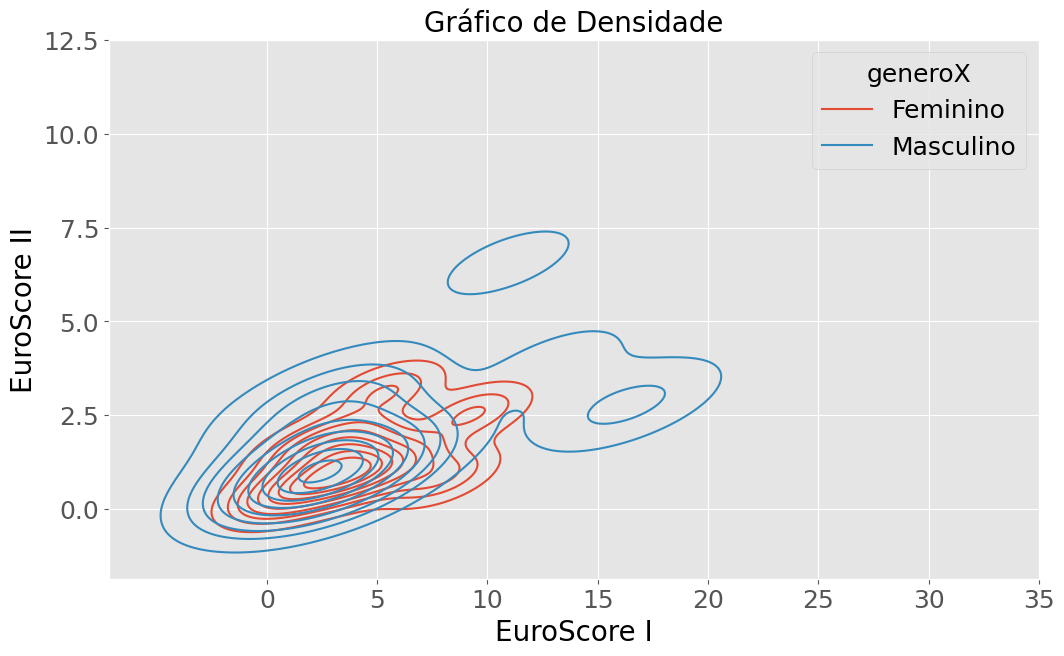

In [ ]:
# Gráfico de densidades

plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 18})

sns.kdeplot(data=df2, x="es1", y="es2", hue="generoX")
plt.title('Gráfico de Densidade', fontsize=20)
plt.xlabel('EuroScore I', fontsize=20, color = 'black')
plt.ylabel('EuroScore II', fontsize=20, color = 'black')

plt.xticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.yticks([0, 2.5, 5, 7.5, 10, 12.5])

plt.grid(True)

#plt.savefig('densityplot.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

Text(0, 0.5, 'EuroScore II')

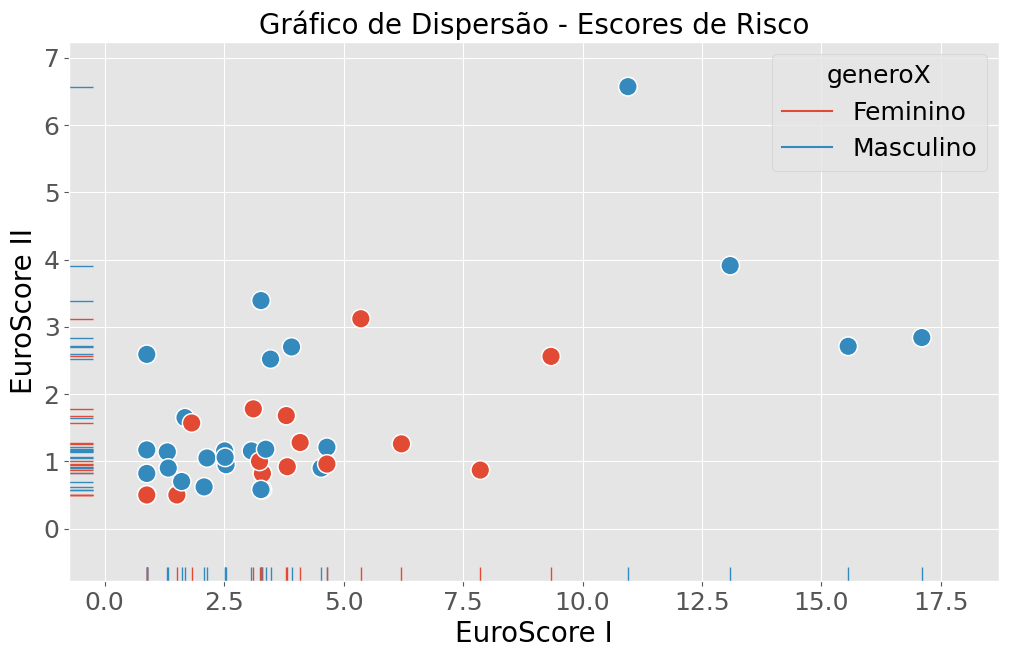

In [ ]:
# Gráfico de dispersão

plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 18})

sns.scatterplot(data=df2, x="es1", y="es2", hue="generoX", s=180)
sns.rugplot(data=df2, x="es1", y="es2", hue="generoX")
plt.title('Gráfico de Dispersão - Escores de Risco', fontsize=20)
plt.xlabel('EuroScore I', fontsize=20, color='black')
plt.ylabel('EuroScore II', fontsize=20, color='black')

#plt.savefig('densityplot.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

Text(45.58065624999999, 0.5, 'EuroScore I')

<Figure size 1200x700 with 0 Axes>

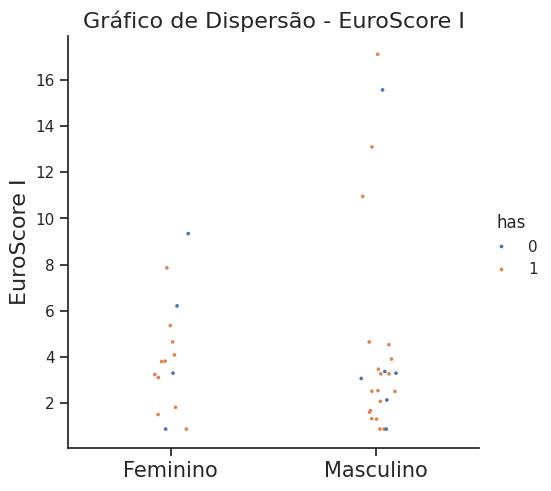

In [ ]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 18})

sns.set_theme(style="ticks")
g = sns.catplot(x="generoX", y="es1", hue="has", data=df2, s=7)

plt.xticks(rotation='horizontal', fontsize=15)

plt.title('Gráfico de Dispersão - EuroScore I', fontsize=16)
plt.xlabel('', fontsize=15)
plt.ylabel('EuroScore I', fontsize=16)

#plt.savefig('densityplot.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

<Figure size 1200x700 with 0 Axes>

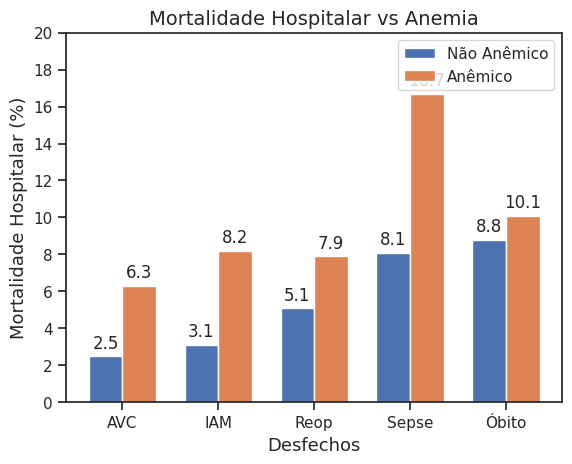

In [ ]:
# BarPlot

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))

labels = ['AVC', 'IAM', 'Reop', 'Sepse', 'Óbito']
na = [2.5, 3.1, 5.1, 8.1, 8.8]
a = [6.3, 8.2, 7.9, 16.7, 10.1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, na, width, label='Não Anêmico')
rects2 = ax.bar(x + width/2, a, width, label='Anêmico')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('Mortalidade Hospitalar vs Anemia', fontsize=14)
plt.xlabel('Desfechos', fontsize=13)
plt.ylabel('Mortalidade Hospitalar (%)', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.grid(False)

# plt.savefig('barplot1.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
df2.head(1)

,genero,generoX,idade,dias_inter,dias_obito,obito,es1,es2,has,dm,dpoc,tabagismo,irc,creat_pre,prob
0,0,Feminino,35.0,15.0,NaN,0,1.51,0.5,1,0,0,0,0,0.9,0.037216
